# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [125]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = 'train.p'
validation_file='valid.p'
testing_file = 'test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [126]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results
import numpy as np

# TODO: Number of training examples
n_train = len(train['labels'])

# TODO: Number of validation examples
n_validation = len(valid['labels'])

# TODO: Number of testing examples.
n_test = len(test['labels'])

# TODO: What's the shape of an traffic sign image?
image_shape = train['features'][0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(list(set(train['labels']))) #convert to set to get unique values

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

2


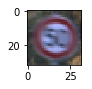

In [127]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import random
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

for i in range(1):
    index = random.randint(0, len(train['features']))
    image = train['features'][index]
    plt.figure(figsize=(1,1))
    plt.imshow(image)
    print(train['labels'][index])

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [128]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
### Feel free to use as many code cells as needed.
#print(train['features'][0])

def normalize(img):
    return (img - 128.0) / 128.0

train['normalized'] = []
for i in range(n_train):
    #train['normalized'].append(((train['features'][i]) - 128.0) / 128.0)
    train['normalized'].append(normalize(train['features'][i]))

valid['normalized'] = []
for i in range(n_validation):
    #train['normalized'].append(((train['features'][i]) - 128.0) / 128.0)
    valid['normalized'].append(normalize(valid['features'][i]))
#print(train['normalized'][0])

### Model Architecture

In [142]:
### Define your architecture here.
### Feel free to use as many code cells as needed.
import tensorflow as tf
from tensorflow.contrib.layers import flatten

keep_prob = tf.placeholder(tf.float32)

def LeNet(x, num_classes):
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1

    # TODO: Layer 1: Convolutional. Input = 32x32x3. Output = 28x28x6.
    padding = 'VALID'
    l1_conv_strides = [1,1,1,1]
    weights_l1 = tf.Variable(tf.truncated_normal([5,5,3,6], mean = mu, stddev = sigma))
    bias_l1 = tf.Variable(tf.truncated_normal([6], mean=mu, stddev=sigma))

    x = tf.nn.conv2d(x, weights_l1, l1_conv_strides, padding, name='l1_conv')
    x = tf.nn.bias_add(x, bias_l1, name = 'l1_bias')

    # TODO: Activation.
    x = tf.nn.relu(x, name='l1_activation')
    #x = tf.nn.dropout(x, keep_prob)
    
    # TODO: Pooling. Input = 28x28x6. Output = 14x14x6.

    l1_pooling_kernel = [1, 2, 2, 1]
    l1_pooling_strides = [1, 2, 2, 1]
    x = tf.nn.max_pool(x, l1_pooling_kernel, l1_pooling_strides, padding, name='l1_pool')

    # TODO: Layer 2: Convolutional. Output = 10x10x16.
    l2_conv_strides = [1, 1, 1, 1]
    weights_l2 = tf.Variable(tf.truncated_normal([5,5,6,16], mean = mu, stddev = sigma))
    bias_l2 = tf.Variable(tf.truncated_normal([16], mean=mu, stddev=sigma))
    x = tf.nn.conv2d(x, weights_l2, l2_conv_strides, padding, name='l2_conv')
    x = tf.nn.bias_add(x, bias_l2, name='l2_bias')

    #  TODO: Activation.
    x = tf.nn.relu(x, name='l2_activation')
    #x = tf.nn.dropout(x, keep_prob)
    
    # TODO: Pooling. Input = 10x10x16. Output = 5x5x16.
    l2_pooling_kernel = [1,2,2,1]
    l2_pooling_strides = [1,2,2,1]
    x = tf.nn.max_pool(x, l2_pooling_kernel, l2_pooling_strides, padding, name='l2_pool')

    # TODO: Flatten. Input = 5x5x16. Output = 400.
    x = tf.contrib.layers.flatten(x)
    #x = tf.reshape(x, [-1, 400])

    # TODO: Layer 3: Fully Connected. Input = 400. Output = 120.
    l3_weights = tf.Variable(tf.truncated_normal([400, 120]))
    l3_bias = tf.Variable(tf.truncated_normal([120]))
    x = tf.add(tf.matmul(x, l3_weights), l3_bias)

    # TODO: Activation.
    x = tf.nn.relu(x, name = 'l3_activation')
    x = tf.nn.dropout(x, keep_prob)

    # TODO: Layer 4: Fully Connected. Input = 120. Output = 84.
    l4_weights = tf.Variable(tf.truncated_normal([120, 84]))
    l4_bias = tf.Variable(tf.truncated_normal([84]))
    x = tf.add(tf.matmul(x, l4_weights), l4_bias)

    # TODO: Activation.
    x = tf.nn.relu(x, name = 'l4_activation')
    #x = tf.nn.dropout(x, keep_prob)

    # TODO: Layer 5: Fully Connected. Input = 84. Output = num_classes.
    l5_weights = tf.Variable(tf.truncated_normal([84,num_classes]))
    l5_bias = tf.Variable(tf.truncated_normal([num_classes]))

    logits = tf.add(tf.matmul(x, l5_weights), l5_bias)

    return logits

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [143]:
from sklearn.utils import shuffle

### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.

x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, n_classes)

rate = 0.001
EPOCHS = 200
BATCH_SIZE = 128

logits = LeNet(x, n_classes)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

In [144]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 1.0})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

In [145]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = n_train
    
    print("Training...")

    for i in range(EPOCHS):
        X_train, y_train = shuffle(train['normalized'], train['labels'])
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 0.5})
            
        training_accuracy = evaluate(train['normalized'], train['labels'])
        validation_accuracy = evaluate(valid['normalized'], valid['labels'])
        print("EPOCH {} ...".format(i+1))
        print("Training Accuracy = {:.3f}".format(training_accuracy))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, './lenet')
    print("Model saved")

Training...


EPOCH 1 ...
Training Accuracy = 0.059
Validation Accuracy = 0.035



EPOCH 2 ...
Training Accuracy = 0.075
Validation Accuracy = 0.076



EPOCH 3 ...
Training Accuracy = 0.116
Validation Accuracy = 0.113



EPOCH 4 ...
Training Accuracy = 0.129
Validation Accuracy = 0.122



EPOCH 5 ...
Training Accuracy = 0.148
Validation Accuracy = 0.132



EPOCH 6 ...
Training Accuracy = 0.147
Validation Accuracy = 0.132



EPOCH 7 ...
Training Accuracy = 0.179
Validation Accuracy = 0.155



EPOCH 8 ...
Training Accuracy = 0.187
Validation Accuracy = 0.173



EPOCH 9 ...
Training Accuracy = 0.211
Validation Accuracy = 0.195



EPOCH 10 ...
Training Accuracy = 0.241
Validation Accuracy = 0.225



EPOCH 11 ...
Training Accuracy = 0.270
Validation Accuracy = 0.249



EPOCH 12 ...
Training Accuracy = 0.289
Validation Accuracy = 0.277



EPOCH 13 ...
Training Accuracy = 0.278
Validation Accuracy = 0.255



EPOCH 14 ...
Training Accuracy = 0.324
Validation Accuracy = 0.296



EPOCH 15 ...
Training Accuracy = 0.334
Validation Accuracy = 0.312



EPOCH 16 ...
Training Accuracy = 0.338
Validation Accuracy = 0.303



EPOCH 17 ...
Training Accuracy = 0.391
Validation Accuracy = 0.337



EPOCH 18 ...
Training Accuracy = 0.394
Validation Accuracy = 0.337



EPOCH 19 ...
Training Accuracy = 0.419
Validation Accuracy = 0.355



EPOCH 20 ...
Training Accuracy = 0.426
Validation Accuracy = 0.353



EPOCH 21 ...
Training Accuracy = 0.425
Validation Accuracy = 0.369



EPOCH 22 ...
Training Accuracy = 0.456
Validation Accuracy = 0.384



EPOCH 23 ...
Training Accuracy = 0.453
Validation Accuracy = 0.395



EPOCH 24 ...
Training Accuracy = 0.484
Validation Accuracy = 0.424



EPOCH 25 ...
Training Accuracy = 0.504
Validation Accuracy = 0.435



EPOCH 26 ...
Training Accuracy = 0.506
Validation Accuracy = 0.435



EPOCH 27 ...
Training Accuracy = 0.526
Validation Accuracy = 0.473



EPOCH 28 ...
Training Accuracy = 0.529
Validation Accuracy = 0.474



EPOCH 29 ...
Training Accuracy = 0.537
Validation Accuracy = 0.464



EPOCH 30 ...
Training Accuracy = 0.566
Validation Accuracy = 0.482



EPOCH 31 ...
Training Accuracy = 0.554
Validation Accuracy = 0.489



EPOCH 32 ...
Training Accuracy = 0.563
Validation Accuracy = 0.497



EPOCH 33 ...
Training Accuracy = 0.569
Validation Accuracy = 0.513



EPOCH 34 ...
Training Accuracy = 0.586
Validation Accuracy = 0.528



EPOCH 35 ...
Training Accuracy = 0.622
Validation Accuracy = 0.567



EPOCH 36 ...
Training Accuracy = 0.599
Validation Accuracy = 0.532



EPOCH 37 ...
Training Accuracy = 0.620
Validation Accuracy = 0.559



EPOCH 38 ...
Training Accuracy = 0.607
Validation Accuracy = 0.528



EPOCH 39 ...
Training Accuracy = 0.633
Validation Accuracy = 0.575



EPOCH 40 ...
Training Accuracy = 0.591
Validation Accuracy = 0.523



EPOCH 41 ...
Training Accuracy = 0.651
Validation Accuracy = 0.600



EPOCH 42 ...
Training Accuracy = 0.671
Validation Accuracy = 0.603



EPOCH 43 ...
Training Accuracy = 0.648
Validation Accuracy = 0.578



EPOCH 44 ...
Training Accuracy = 0.679
Validation Accuracy = 0.627



EPOCH 45 ...
Training Accuracy = 0.678
Validation Accuracy = 0.617



EPOCH 46 ...
Training Accuracy = 0.669
Validation Accuracy = 0.618



EPOCH 47 ...
Training Accuracy = 0.684
Validation Accuracy = 0.639



EPOCH 48 ...
Training Accuracy = 0.706
Validation Accuracy = 0.651



EPOCH 49 ...
Training Accuracy = 0.723
Validation Accuracy = 0.679



EPOCH 50 ...
Training Accuracy = 0.722
Validation Accuracy = 0.657



EPOCH 51 ...
Training Accuracy = 0.728
Validation Accuracy = 0.662



EPOCH 52 ...
Training Accuracy = 0.760
Validation Accuracy = 0.706



EPOCH 53 ...
Training Accuracy = 0.747
Validation Accuracy = 0.678



EPOCH 54 ...
Training Accuracy = 0.760
Validation Accuracy = 0.716



EPOCH 55 ...
Training Accuracy = 0.792
Validation Accuracy = 0.747



EPOCH 56 ...
Training Accuracy = 0.773
Validation Accuracy = 0.721



EPOCH 57 ...
Training Accuracy = 0.792
Validation Accuracy = 0.725



EPOCH 58 ...
Training Accuracy = 0.799
Validation Accuracy = 0.740



EPOCH 59 ...
Training Accuracy = 0.813
Validation Accuracy = 0.756



EPOCH 60 ...
Training Accuracy = 0.792
Validation Accuracy = 0.736



EPOCH 61 ...
Training Accuracy = 0.811
Validation Accuracy = 0.759



EPOCH 62 ...
Training Accuracy = 0.817
Validation Accuracy = 0.759



EPOCH 63 ...
Training Accuracy = 0.811
Validation Accuracy = 0.757



EPOCH 64 ...
Training Accuracy = 0.817
Validation Accuracy = 0.746



EPOCH 65 ...
Training Accuracy = 0.830
Validation Accuracy = 0.780



EPOCH 66 ...
Training Accuracy = 0.843
Validation Accuracy = 0.788



EPOCH 67 ...
Training Accuracy = 0.837
Validation Accuracy = 0.783



EPOCH 68 ...
Training Accuracy = 0.837
Validation Accuracy = 0.772



EPOCH 69 ...
Training Accuracy = 0.848
Validation Accuracy = 0.796



EPOCH 70 ...
Training Accuracy = 0.855
Validation Accuracy = 0.798



EPOCH 71 ...
Training Accuracy = 0.834
Validation Accuracy = 0.780



EPOCH 72 ...
Training Accuracy = 0.842
Validation Accuracy = 0.775



EPOCH 73 ...
Training Accuracy = 0.845
Validation Accuracy = 0.795



EPOCH 74 ...
Training Accuracy = 0.833
Validation Accuracy = 0.760



EPOCH 75 ...
Training Accuracy = 0.843
Validation Accuracy = 0.785



EPOCH 76 ...
Training Accuracy = 0.879
Validation Accuracy = 0.828



EPOCH 77 ...
Training Accuracy = 0.833
Validation Accuracy = 0.770



EPOCH 78 ...
Training Accuracy = 0.853
Validation Accuracy = 0.802



EPOCH 79 ...
Training Accuracy = 0.854
Validation Accuracy = 0.795



EPOCH 80 ...
Training Accuracy = 0.875
Validation Accuracy = 0.829



EPOCH 81 ...
Training Accuracy = 0.841
Validation Accuracy = 0.774



EPOCH 82 ...
Training Accuracy = 0.885
Validation Accuracy = 0.833



EPOCH 83 ...
Training Accuracy = 0.867
Validation Accuracy = 0.806



EPOCH 84 ...
Training Accuracy = 0.883
Validation Accuracy = 0.823



EPOCH 85 ...
Training Accuracy = 0.874
Validation Accuracy = 0.820



EPOCH 86 ...
Training Accuracy = 0.883
Validation Accuracy = 0.812



EPOCH 87 ...
Training Accuracy = 0.872
Validation Accuracy = 0.822



EPOCH 88 ...
Training Accuracy = 0.869
Validation Accuracy = 0.811



EPOCH 89 ...
Training Accuracy = 0.881
Validation Accuracy = 0.828



EPOCH 90 ...
Training Accuracy = 0.877
Validation Accuracy = 0.835



EPOCH 91 ...
Training Accuracy = 0.893
Validation Accuracy = 0.843



EPOCH 92 ...
Training Accuracy = 0.865
Validation Accuracy = 0.796



EPOCH 93 ...
Training Accuracy = 0.873
Validation Accuracy = 0.820



EPOCH 94 ...
Training Accuracy = 0.875
Validation Accuracy = 0.811



EPOCH 95 ...
Training Accuracy = 0.874
Validation Accuracy = 0.808



EPOCH 96 ...
Training Accuracy = 0.887
Validation Accuracy = 0.824



EPOCH 97 ...
Training Accuracy = 0.871
Validation Accuracy = 0.810



EPOCH 98 ...
Training Accuracy = 0.898
Validation Accuracy = 0.839



EPOCH 99 ...
Training Accuracy = 0.896
Validation Accuracy = 0.834



EPOCH 100 ...
Training Accuracy = 0.897
Validation Accuracy = 0.835



EPOCH 101 ...
Training Accuracy = 0.906
Validation Accuracy = 0.852



EPOCH 102 ...
Training Accuracy = 0.873
Validation Accuracy = 0.815



EPOCH 103 ...
Training Accuracy = 0.882
Validation Accuracy = 0.823



EPOCH 104 ...
Training Accuracy = 0.885
Validation Accuracy = 0.821



EPOCH 105 ...
Training Accuracy = 0.873
Validation Accuracy = 0.810



EPOCH 106 ...
Training Accuracy = 0.885
Validation Accuracy = 0.824



EPOCH 107 ...
Training Accuracy = 0.909
Validation Accuracy = 0.855



EPOCH 108 ...
Training Accuracy = 0.891
Validation Accuracy = 0.815



EPOCH 109 ...
Training Accuracy = 0.898
Validation Accuracy = 0.838



EPOCH 110 ...
Training Accuracy = 0.880
Validation Accuracy = 0.815



EPOCH 111 ...
Training Accuracy = 0.916
Validation Accuracy = 0.860



EPOCH 112 ...
Training Accuracy = 0.914
Validation Accuracy = 0.854



EPOCH 113 ...
Training Accuracy = 0.916
Validation Accuracy = 0.861



EPOCH 114 ...
Training Accuracy = 0.924
Validation Accuracy = 0.863



EPOCH 115 ...
Training Accuracy = 0.917
Validation Accuracy = 0.857



EPOCH 116 ...
Training Accuracy = 0.923
Validation Accuracy = 0.865



EPOCH 117 ...
Training Accuracy = 0.909
Validation Accuracy = 0.850



EPOCH 118 ...
Training Accuracy = 0.914
Validation Accuracy = 0.855



EPOCH 119 ...
Training Accuracy = 0.912
Validation Accuracy = 0.848



EPOCH 120 ...
Training Accuracy = 0.914
Validation Accuracy = 0.851



EPOCH 121 ...
Training Accuracy = 0.920
Validation Accuracy = 0.861



EPOCH 122 ...
Training Accuracy = 0.925
Validation Accuracy = 0.865



EPOCH 123 ...
Training Accuracy = 0.927
Validation Accuracy = 0.866



EPOCH 124 ...
Training Accuracy = 0.915
Validation Accuracy = 0.846



EPOCH 125 ...
Training Accuracy = 0.934
Validation Accuracy = 0.879



EPOCH 126 ...
Training Accuracy = 0.924
Validation Accuracy = 0.868



EPOCH 127 ...
Training Accuracy = 0.916
Validation Accuracy = 0.862



EPOCH 128 ...
Training Accuracy = 0.902
Validation Accuracy = 0.835



EPOCH 129 ...
Training Accuracy = 0.932
Validation Accuracy = 0.877



EPOCH 130 ...
Training Accuracy = 0.920
Validation Accuracy = 0.859



EPOCH 131 ...
Training Accuracy = 0.920
Validation Accuracy = 0.851



EPOCH 132 ...
Training Accuracy = 0.914
Validation Accuracy = 0.854



EPOCH 133 ...
Training Accuracy = 0.930
Validation Accuracy = 0.855



EPOCH 134 ...
Training Accuracy = 0.937
Validation Accuracy = 0.875



EPOCH 135 ...
Training Accuracy = 0.940
Validation Accuracy = 0.876



EPOCH 136 ...
Training Accuracy = 0.923
Validation Accuracy = 0.864



EPOCH 137 ...
Training Accuracy = 0.937
Validation Accuracy = 0.887



EPOCH 138 ...
Training Accuracy = 0.938
Validation Accuracy = 0.875



EPOCH 139 ...
Training Accuracy = 0.938
Validation Accuracy = 0.878



EPOCH 140 ...
Training Accuracy = 0.903
Validation Accuracy = 0.837



EPOCH 141 ...
Training Accuracy = 0.926
Validation Accuracy = 0.849



---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

In [ ]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

### Predict the Sign Type for Each Image

In [3]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.

### Analyze Performance

In [4]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.

### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tk.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [3]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [ ]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")